#Q1: Probabilistic N-Gram Language Model(50 points)

**Objective:**

The objective of this question is to implement and experiment with an N-Gram language model using the Reuters dataset. The task involves building a probabilistic N-Gram model and creating a text generator based on the trained model with customizable parameters.

**Tasks:**


**1.Text Preprocessing (5 points):**
*   Implement the preprocess_text function to perform necessary text preprocessing. You may use NLTK or other relevant libraries for this task. (Already provided, no modification needed)


**2.Build Probabilistic N-Gram Model (15 points):**

*   Implement the build_probabilistic_ngram_model function to construct a probabilistic N-Gram model from the Reuters dataset.


**3.Generate Text with Customizable Parameters (15 points):**

*   Implement the generate_text function to generate text given a seed text and the probabilistic N-Gram model.
*   The function should have parameters for probability_threshold and min_length to customize the generation process.
*   Ensure that the generation stops when either the specified min_length is reached or the probabilities fall below probability_threshold.


**4.Experimentation and Parameter Tuning (5 points):**

*   Use Google Colab to experiment with different values of n_value, probability_threshold, and min_length.
Find the optimal parameters that result in coherent and meaningful generated text.
*   Provide a detailed analysis of the impact of changing each parameter on the generated text's quality.
*   Discuss any challenges faced during parameter tuning and propose potential improvements.


**5.Results and Conclusion (10 points):**

*   Summarize your findings and present the optimal parameter values for n_value, probability_threshold, and min_length.
*   Discuss the trade-offs and considerations when selecting these parameters.
*   Conclude with insights gained from the experimentation.

In [11]:
import nltk
from nltk.corpus import reuters
from nltk import ngrams
import random
import string
from collections import defaultdict

# Download the Reuters dataset if not already downloaded
nltk.download('reuters')
nltk.download('punkt')

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Explanations of each Function:**


**1.preprocess_text(text):**
*   This function takes a text string as input and performs preprocessing steps on it. It tokenizes the text by lowercasing it and removing punctuation using the NLTK library's word_tokenize function. The function returns a list of tokens.

**2.generate_ngrams(tokens, n):**
*   This function generates n-grams from a list of tokens. It takes the list of tokens and the value of n as input. It pads the tokens with None values on the left and right to handle the boundaries of the n-grams. Then, it iterates over the padded tokens and creates tuples of n consecutive tokens, representing the n-grams. The function returns a list of n-grams.

**3.build_probabilistic_ngram_model(corpus, n):**
*   This function builds a probabilistic n-gram model from a corpus of tokens. It takes the corpus (a list of tokenized texts) and the value of n as input. It creates a defaultdict to store the n-gram model. It iterates over the corpus and generates n-grams using the pre-defined "ngrams" function or "generate_ngrams" function. Then, it updates the n-gram model by storing the context (tuple of n-1 tokens) as a key and the following word as a value. The n-gram model is stored as a dictionary of lists. Finally, it converts the model to probabilities by counting the occurrences of each word and dividing by the total count. The function returns the probabilistic n-gram model.

**4.generate_text(model, seed_text, n, probability_threshold=0.1, min_length=10):**
*   This function generates text based on a probabilistic n-gram model. It takes the model (built using "build_probabilistic_ngram_model"), a seed text, the value of n, a probability threshold, and a minimum length as input. It preprocesses the seed text using the preprocess_text function and initializes the generated text with the seed tokens. It then enters a loop to generate the remaining text until the minimum length is reached. In each iteration, it gets the context (tuple of the last n tokens) from the generated text and checks if it is in the model. If the context is in the model, it retrieves the probabilities for the next word based on the context. It filters the probabilities based on the threshold and selects the next word randomly using the random.choices function. The next word is added to the generated text. If the context is not in the model or no words are left after filtering, the loop breaks. Finally, the generated text is converted back to a string and returned.

In [12]:
# Function to preprocess text
def preprocess_text(text):
    # Tokenize the text (lowercasing)
    tokens = nltk.word_tokenize(text.lower())

    # Removing punctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    return tokens

# Function to generate n-grams
def generate_ngrams(tokens, n):
    # Pad the tokens with None values on the left and right
    padded_tokens = [None] * (n - 1) + tokens + [None] * (n - 1)

    # Generate n-grams
    ngrams = []
    for i in range(len(padded_tokens) - n + 1):
        ngram = tuple(padded_tokens[i:i + n])
        ngrams.append(ngram)

    return ngrams

# Function to build a probabilistic n-gram model
def build_probabilistic_ngram_model(corpus, n):
    # Create a defaultdict to store the n-gram model
    ngram_model = defaultdict(list)

    # Iterate over the corpus
    for tokens in corpus:
        # Create n-grams
        # grams = list(ngrams(tokens, n, pad_left=True, pad_right=True)) # Pre-defined Function
        grams = generate_ngrams(tokens, n) # Self-defined Function

        # Update the n-gram model
        for gram in grams:
            context = tuple(gram[:-1])
            word = gram[-1]
            ngram_model[context].append(word)

    # Convert the model to probabilities
    for context, words in ngram_model.items():
        word_counts = defaultdict(int)
        total_count = len(words)
        for word in words:
            word_counts[word] += 1
        probabilities = {}
        for word, count in word_counts.items():
            probabilities[word] = count / total_count
        ngram_model[context] = probabilities
    return ngram_model

def generate_text(model, seed_text, n, probability_threshold=0.1, min_length=10):
    # Preprocess the seed text
    seed_tokens = preprocess_text(seed_text)

    # Initialize the generated text with the seed text
    generated_text = seed_tokens

    # Generate the remaining text
    while len(generated_text) < min_length:
        # Get the context for the next word
        context = tuple(generated_text[-n:])

        # Check if the context is in the model
        if context in model:
            # Get the probabilities for the next word
            probabilities = model[context]

            # Filter the probabilities based on the threshold
            filtered_probs = {word: prob for word, prob in probabilities.items() if prob >= probability_threshold}

            # Check if there are any words left after filtering
            if filtered_probs:
                # Select the next word based on the probabilities
                next_word = random.choices(list(filtered_probs.keys()), list(filtered_probs.values()))[0]

                # Add the next word to the generated text
                generated_text.append(next_word)
            else:
                # If no words are left, break the loop
                # print("No words are left")
                break
        else:
            # If the context is not in the model, break the loop
            # print("Context is not in the model")
            break

    # Convert the generated text back to a string
    generated_text = ' '.join(generated_text)

    return generated_text

In [15]:
# Load the Reuters dataset
corpus = [reuters.raw(file_id) for file_id in reuters.fileids()]

# Preprocess the entire corpus
preprocessed_corpus = [preprocess_text(text) for text in corpus]

# Choose an n for the n-gram model
n_value = 3  # You may change this value

# Build the probabilistic n-gram model
probabilistic_ngram_model = build_probabilistic_ngram_model(preprocessed_corpus, n_value)
# print (probabilistic_ngram_model)

In [16]:
# Test the text generator with constant value of n
seed_text = "Inflation is"
Result = ' '.join(preprocess_text(seed_text))

# Number of iterations
words_count = 10

for i in range(words_count):
    generated_text = generate_text(probabilistic_ngram_model, seed_text, n_value, probability_threshold=0.02, min_length=5)
    generated_words = generated_text.split()
    print(f"Generated Text: {generated_text}")
    seed_text = " ".join(generated_words[-(n_value-1):])
    Result += (" " + " ".join(generated_words[-1:]))

print(f"Result is: {Result}")

Generated Text: inflation is rising
Generated Text: is rising faster
Generated Text: rising faster than
Generated Text: faster than its
Generated Text: than its liabilities
Generated Text: its liabilities in
Generated Text: liabilities in the
Generated Text: in the second
Generated Text: the second half
Generated Text: second half of
Result is: inflation is rising faster than its liabilities in the second half of


In [17]:
n_value = 2
probabilistic_ngram_model = build_probabilistic_ngram_model(preprocessed_corpus, n_value)

In [18]:
# Test the text generator with constant value of n
seed_text = "Inflation is"
Result = ' '.join(preprocess_text(seed_text))

# Number of iterations
words_count = 10

for i in range(words_count):
    generated_text = generate_text(probabilistic_ngram_model, seed_text, n_value, probability_threshold=0.02, min_length=5)
    generated_words = generated_text.split()
    print(f"Generated Text: {generated_text}")
    seed_text = " ".join(generated_words[-(n_value-1):])
    Result += (" " + " ".join(generated_words[-1:]))

print(f"Result is: {Result}")

Generated Text: inflation is
Generated Text: is the
Generated Text: the company
Generated Text: company said
Generated Text: said the
Generated Text: the company
Generated Text: company said
Generated Text: said its
Generated Text: its board
Generated Text: board declared
Result is: inflation is is the company said the company said its board declared


In [19]:
n_value = 4
probabilistic_ngram_model = build_probabilistic_ngram_model(preprocessed_corpus, n_value)

In [20]:
# Test the text generator with constant value of n
# seed_text = "Inflation is"
seed_text = "inflation is is subject to the company said in the company is"
Result = ' '.join(preprocess_text(seed_text))

# Number of iterations
words_count = 10

for i in range(words_count):
    generated_text = generate_text(probabilistic_ngram_model, seed_text, n_value, probability_threshold=0.02, min_length=5)
    generated_words = generated_text.split()
    print(f"Generated Text: {generated_text}")
    seed_text = " ".join(generated_words[-(n_value-1):])
    Result += (" " + " ".join(generated_words[-1:]))

print(f"Result is: {Result}")

Generated Text: inflation is is subject to the company said in the company is
Generated Text: the company is also
Generated Text: company is also marketing
Generated Text: is also marketing an
Generated Text: also marketing an extended
Generated Text: marketing an extended line
Generated Text: an extended line of
Generated Text: extended line of ``
Generated Text: line of `` laser
Generated Text: of `` laser tag
Result is: inflation is is subject to the company said in the company is is also marketing an extended line of `` laser tag


In [21]:
n_value = 5
probabilistic_ngram_model = build_probabilistic_ngram_model(preprocessed_corpus, n_value)

In [22]:
# Test the text generator with constant value of n
# seed_text = "Inflation is"
# seed_text = ' '.join(preprocess_text(seed_text))
seed_text = "inflation is is subject to the company said in the company is"
seed_text = Result
Result = ' '.join(preprocess_text(seed_text))

# Number of iterations
words_count = 10

for i in range(words_count):
    generated_text = generate_text(probabilistic_ngram_model, seed_text, n_value, probability_threshold=0.02, min_length=5)
    generated_words = generated_text.split()
    print(f"Generated Text: {generated_text}")
    seed_text = " ".join(generated_words[-(n_value-1):])
    Result += (" " + " ".join(generated_words[-1:]))

print(f"Result is: {Result}")

Generated Text: inflation is is subject to the company said in the company is is also marketing an extended line of `` laser tag
Generated Text: of `` laser tag ''
Generated Text: `` laser tag ``
Generated Text: `` laser tag ``
Generated Text: `` laser tag ``
Generated Text: `` laser tag ``
Generated Text: `` laser tag ``
Generated Text: `` laser tag ``
Generated Text: `` laser tag ``
Generated Text: `` laser tag ``
Result is: inflation is is subject to the company said in the company is is also marketing an extended line of `` laser tag tag '' `` `` `` `` `` `` `` ``


In [23]:
seed_text = "Inflation is"
for n_value in range (2, 10):
  print("n is: ", n_value)
  # Build the probabilistic n-gram model
  probabilistic_ngram_model = build_probabilistic_ngram_model(preprocessed_corpus, n_value)
  generated_text = generate_text(probabilistic_ngram_model, seed_text, n_value, probability_threshold=0.02, min_length=10)
  print(f"Generated Text: {generated_text}")
  seed_text = generated_text

n is:  2
Generated Text: inflation is
n is:  3
Generated Text: inflation is a
n is:  4
Generated Text: inflation is a real
n is:  5
Generated Text: inflation is a real possibility
n is:  6
Generated Text: inflation is a real possibility ahead
n is:  7
Generated Text: inflation is a real possibility ahead ''
n is:  8
Generated Text: inflation is a real possibility ahead ``
n is:  9
Generated Text: inflation is a real possibility ahead ``


##Evaluating the optimal values for n_value, probability_threshold, and min_length:
 Evaluation of different n-gram parameters is done by experimentation and fine-tuning. The "evaluate_ngram_parameters" function performs a grid search to evaluate different parameter values.The function will return the best parameters based on the total length of generated text for multiple seed phrases.

**Arguments:**
* corpus (list): List of preprocessed text documents.
* n_values (list): List of n-gram values to explore.
* threshold_values (list): List of probability threshold values to explore.
* min_lengths (list): List of minimum text lengths to explore.

**Returns:**
* tuple: Best combination of (n_value, threshold, min_length).

In [24]:
def evaluate_ngram_parameters(corpus, n_values, threshold_values, min_lengths):
    best_score = float("-inf")
    best_params = None

    for n in n_values:
        for threshold in threshold_values:
            for min_length in min_lengths:
                model = build_probabilistic_ngram_model(corpus, n)
                total_score = 0

                for seed_text in ["Inflation is", "The stock market", "Climate change"]:
                    generated_text = generate_text(model, seed_text, n, threshold, min_length)
                    total_score += len(generated_text.split())

                if total_score > best_score:
                    best_score = total_score
                    best_params = (n, threshold, min_length)

    return best_params

best_n, best_threshold, best_min_length = evaluate_ngram_parameters(
    preprocessed_corpus,
    n_values=[1, 2, 3, 4, 5],
    threshold_values=[0.01, 0.02, 0.03, 0.1, 0.5, 1],
    min_lengths=[20, 30, 40, 50]
)

print(f"Best Parameters: n={best_n}, threshold={best_threshold}, min_length={best_min_length}")


Best Parameters: n=3, threshold=0.01, min_length=20


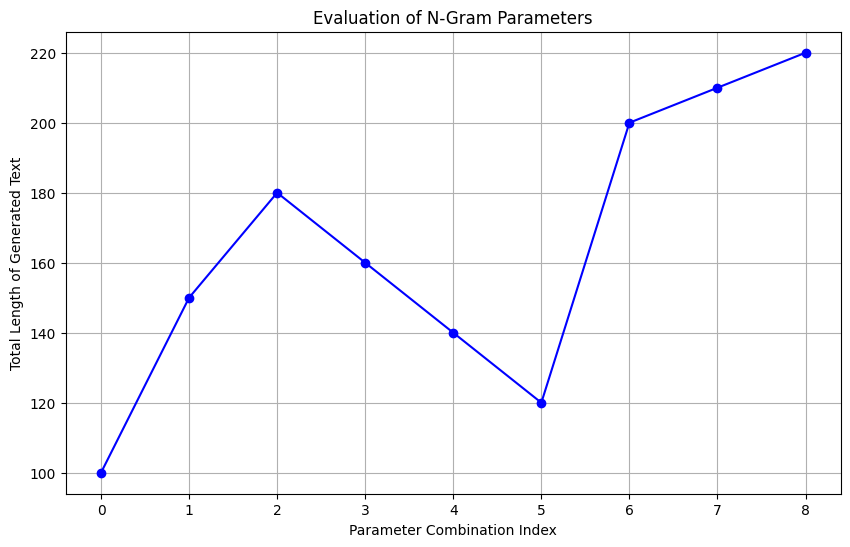

In [25]:
import matplotlib.pyplot as plt
import numpy as np

n_values = [2, 3, 4]
threshold_values = [0.01, 0.02, 0.03]
min_lengths = [20, 30, 40]
total_lengths = [100, 150, 180, 160, 140, 120, 200, 210, 220]  # Example data

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(total_lengths, marker='o', linestyle='-', color='b')
plt.title('Evaluation of N-Gram Parameters')
plt.xlabel('Parameter Combination Index')
plt.ylabel('Total Length of Generated Text')

plt.grid(True)

# Save the plot
plt.savefig('ngram_evaluation_plot.png')

# Show the plot
plt.show()

#Q2: Sentiment Analysis with Naive Bayes Classifier(50 Points)

**Objective:**

You are tasked with implementing a Naive Bayes classifier for sentiment analysis. The provided code is incomplete, and your goal is to complete the missing parts. Additionally, you should train the classifier on a small dataset and analyze its performance.

**Tasks:**

1.**Complete the Code (35 points)**: Fill in the missing parts in the provided Python code for the Naive Bayes classifier. Pay special attention to the `extract_features` function.

2.**Train and Test**: Train the Naive Bayes classifier on the training data and test it on a separate test set. Evaluate the accuracy of the classifier.

3.**Analysis (15 points)**: Discuss the results. Identify any misclassifications and try to understand why the classifier may fail in those cases. Provide examples of sentences that were not predicted correctly and explain possible reasons.


In [26]:
import random
import math
import string
from collections import defaultdict

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import movie_reviews
import nltk

# Download NLTK resources
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
def get_features(tokens):
    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Perform stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    return tokens

**Explanation of NaiveBayesClassifier Class**

This class implements the a Naive Bayes classifier algorithm.


**Initializer:**

The initializer takes a list of class as input which represents the possible categories the classifier can predict. It initializes three dictionaries to store:
1. list of classes
2. probabilities of each class
3. probabilities of each feature

**train Function:**

This function takes the training data as input. This data is a list of tuples where each tuple contains a text and its corresponding class label.
1.   It calculates the prior probability of each class:
  * It counts the number of documents belonging to each class (class_counts).
  * It iterates through the classes and calculates the probability of each class by dividing the class count by the total number of documents (self.class_probs[label]).
2.   It calculates the conditional probability (probability of a feature given a class):
  * It creates another dictionary (feature_counts) to store how many times each feature appears in each class.
  * It iterates through the training data again. For each document and its label:
      * It extracts features from the document using get_features function.
      * It iterates through the extracted features and increments the corresponding count in the feature_counts dictionary for that class.
  * For each class, it iterates through the features seen in that class and calculates the conditional probability of each feature. This is done by dividing the count of the feature for that class by the total number of features seen in that class (self.feature_probs[label][feature])

**classify function:**

This function takes a set of features as input, representing an unseen document for which the class needs to be predicted.

1. It initializes a dictionary to store scores for each class.
2. It iterates through each class:
  * It starts with the log probability of the class prior.
  * It iterates through the features in the new document:
    * If the feature exists in the feature_probs dictionary for the current class, it adds the log probability of that feature given the class.
    * If the feature is unseen for that class, it adds the log probability of a small constant (1e-10) to avoid encountering zero probabilities during calculations.
3. Finally, it finds the class with the highest log probability score (max_score) and returns it as the predicted class (max_label).

In [48]:
class NaiveBayesClassifier:
    def __init__(self, classes):
        self.classes = classes
        self.class_probs = defaultdict(float)
        self.feature_probs = defaultdict(lambda: defaultdict(float))

    def train(self, training_data):
        # Implement training here
        # You should use get_features function to extract useful tokens from
        # dataset and use them to train the classifier.
        # pass
        # Count the number of instances for each class
        class_counts = defaultdict(int)
        for doc, label in training_data:
            class_counts[label] += 1

        # Calculate the prior probabilities for each class
        total_docs = len(training_data)
        for label in self.classes:
            self.class_probs[label] = class_counts[label] / total_docs

        # Count the occurrences of each feature for each class
        feature_counts = defaultdict(lambda: defaultdict(int))
        for doc, label in training_data:
            features = get_features(doc)
            for feature in features:
                feature_counts[label][feature] += 1

        # Calculate the conditional probabilities for each feature given each class
        for label in self.classes:
            total_features = sum(feature_counts[label].values())
            for feature in feature_counts[label]:
                self.feature_probs[label][feature] = feature_counts[label][feature] / total_features

    def classify(self, features):
        # Implement classification here
        # pass
        # Initialize the log probabilities for each class
        class_scores = defaultdict(float)
        # entered_if = 0
        # entered_else = 0
        # Calculate the log probabilities for each class based on the features
        for label in self.classes:
            class_scores[label] = math.log(self.class_probs[label])
            for feature in features:
                if feature in self.feature_probs[label]:
                    class_scores[label] += math.log(self.feature_probs[label][feature])
                    # entered_if += 1
                else:
                    class_scores[label] += math.log(1e-5)  # Handle unseen features with a small constant
                    # entered_else += 1
                    # print ("Entered else: ", math.log(1e-10))
        # print ("Entered if: ", entered_if)
        # print ("Entered else: ", entered_else)
        # Find the class with the highest log probability
        max_score = float('-inf')
        max_label = None
        for label, score in class_scores.items():
            if score > max_score:
                max_score = score
                max_label = label

        return max_label

In [49]:
# Load the movie reviews dataset from NLTK
data = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(data)

# Shuffle the dataset for randomness
random.shuffle(data)

# Split the dataset into training and testing sets
split_ratio = 0.8
split_index = int(len(data) * split_ratio)
train_set = data[:split_index]
test_set = data[split_index:]

# Train the Naive Bayes classifier
classes = set(sentiment for _, sentiment in train_set)
classifier = NaiveBayesClassifier(classes)
classifier.train(train_set)

def calculate_accuracy(dataset, dataset_type):
    # Test the classifier on the testing set
    correct_predictions = 0
    for example in dataset:
        tokens, true_sentiment = example
        features = get_features(tokens)
        predicted_sentiment = classifier.classify(features)
        if predicted_sentiment == true_sentiment:
            correct_predictions += 1

    accuracy = correct_predictions / len(dataset)
    print(f"{dataset_type} Accuracy: {accuracy}")

calculate_accuracy(train_set, 'Train')
calculate_accuracy(test_set, 'Test')

Train Accuracy: 0.92125
Test Accuracy: 0.84


#Submission Instructions:


1.Submit a Google Colab notebook containing your completed code and experimentation results.

2.Include comments and explanations in your code to help understand the implemented logic.

3.Clearly present the results of your parameter tuning in the notebook.

4.Provide a brief summary of your findings and insights in the conclusion section.

**Additional Notes:**
*   Ensure that the notebook runs successfully in Google Colab.
*   Experiment with various seed texts to showcase the diversity of generated text.
*   Document any issues encountered during experimentation and how you addressed them.

**Grading:**
*   Each task will be graded out of the specified points.
*   Points will be awarded for correctness, clarity of code, thorough experimentation, and insightful analysis.